In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
print(sorted([i for i in dir(cv2) if "EVENT" in i]))

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [23]:
img = np.zeros((512, 512, 3), np.uint8)

def draw_circle(ev, x, y, flags, param):
    if ev == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 10, (250, 170, 0), -1)

cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while 1:
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
    
cv2.destroyAllWindows()

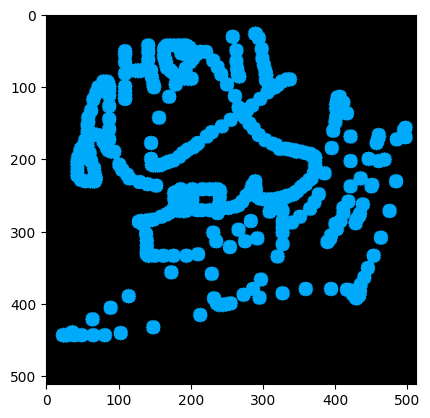

In [25]:
img = np.zeros((512, 512, 3), np.uint8)

is_drawing = False

def brush(ev, x, y, flags, param):
    global is_drawing
    if ev == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
    if ev == cv2.EVENT_MOUSEMOVE and is_drawing:
        cv2.circle(img, (x,y), 10, (250, 170, 0), -1)
    if ev == cv2.EVENT_LBUTTONUP:
        is_drawing = False

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)

while 1:
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
    
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

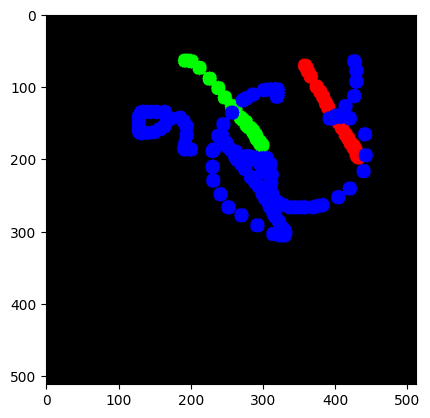

In [31]:
img = np.zeros((512, 512, 3), np.uint8)

class COLORS:
    G=(0,255,0)
    R=(0,0,255)
    B=(255,0,0)

is_drawing = False
color = COLORS.G

def brush(ev, x, y, flags, param):
    global is_drawing, color
    if ev == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
    if ev == cv2.EVENT_MOUSEMOVE and is_drawing:
        cv2.circle(img, (x,y), 10, color, -1)
    if ev == cv2.EVENT_LBUTTONUP:
        is_drawing = False

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)

while 1:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    elif k == ord('r'):
        color = COLORS.R
    elif k == ord('g'):
        color = COLORS.G
    elif k == ord('b'):
        color = COLORS.B
    
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

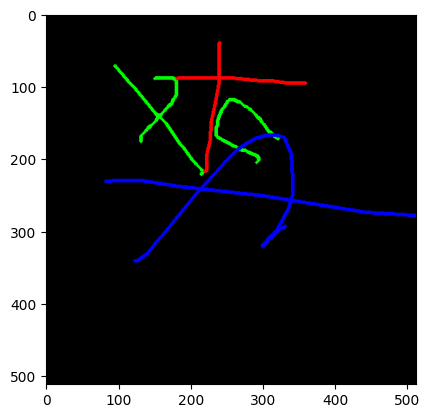

In [36]:
img = np.zeros((512, 512, 3), np.uint8)

class COLORS:
    G=(0,255,0)
    R=(0,0,255)
    B=(255,0,0)

is_drawing = False
color = COLORS.G
start_point = (0, 0)


def brush(ev, x, y, flags, param):
    global is_drawing, color, start_point
    if ev == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
        start_point = (x, y)
    if ev == cv2.EVENT_MOUSEMOVE and is_drawing:
        cv2.line(img, pt1=start_point, pt2=(x,y), color=color, thickness=3)
        start_point = (x, y)
    if ev == cv2.EVENT_LBUTTONUP:
        is_drawing = False
        start_point = (x, y)

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)

while 1:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    elif k == ord('r'):
        color = COLORS.R
    elif k == ord('g'):
        color = COLORS.G
    elif k == ord('b'):
        color = COLORS.B
    
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

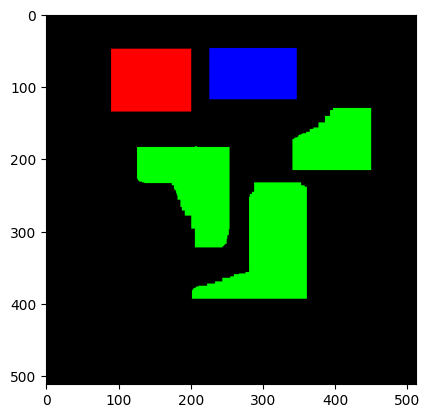

In [41]:
img = np.zeros((512, 512, 3), np.uint8)

class COLORS:
    G=(0,255,0)
    R=(0,0,255)
    B=(255,0,0)

is_drawing = False
color = COLORS.G
start_point = (0, 0)


def draw_rect(ev, x, y, flags, param):
    global is_drawing, color, start_point
    if ev == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
        start_point = (x, y)
    if ev == cv2.EVENT_MOUSEMOVE and is_drawing:
        cv2.rectangle(img, pt1=start_point, pt2=(x,y), color=color, thickness=-1)
    if ev == cv2.EVENT_LBUTTONUP:
        is_drawing = False
        start_point = (0, 0)

cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_rect)

while 1:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    elif k == ord('r'):
        color = COLORS.R
    elif k == ord('g'):
        color = COLORS.G
    elif k == ord('b'):
        color = COLORS.B
    
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

[[(41, 38), (128, 148)], [(173, 202), (304, 328)], [(370, 59), (148, 231)]]


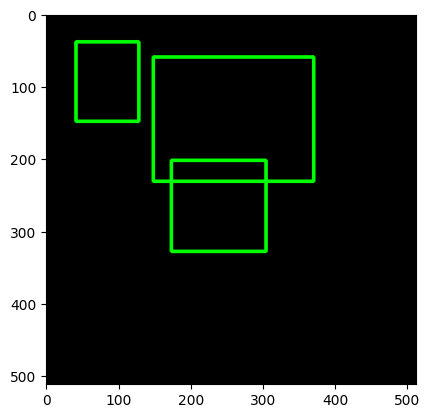

In [44]:
img = np.zeros((512, 512, 3), np.uint8)

class COLORS:
    G=(0,255,0)
    R=(0,0,255)
    B=(255,0,0)

is_drawing = False
color = COLORS.G
start_point = (0, 0)
points = []

def draw_rect(ev, x, y, flags, param):
    global is_drawing, color, start_point
    if ev == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
        start_point = (x, y)
    if ev == cv2.EVENT_LBUTTONUP:
        is_drawing = False
        end_point = (x, y)
        points.append([start_point, end_point])
        cv2.rectangle(img, pt1=start_point, pt2=end_point, color=color, thickness=3)
        start_point = (0, 0)

clone = img.copy()
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_rect)

while 1:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    elif k == ord('r'):
        img = clone.copy()
        points = []
    
cv2.destroyAllWindows()
print(points)
plt.imshow(img[...,::-1])

[[(38, 39), (172, 219)], [(225, 449), (447, 235)]]


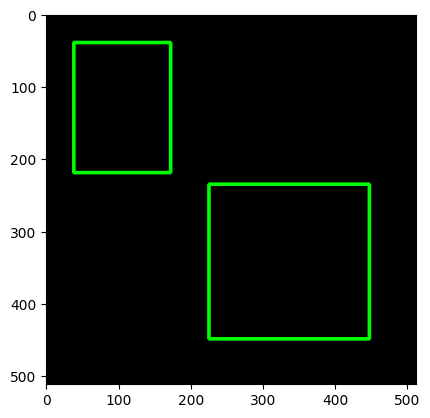

In [53]:
img = np.zeros((512, 512, 3), np.uint8)

class COLORS:
    G=(0,255,0)
    R=(0,0,255)
    B=(255,0,0)

is_drawing = False
color = COLORS.G
start_point = (0, 0)
points = []
last_scene = None

def draw_rect(ev, x, y, flags, param):
    global is_drawing, color, start_point, last_scene, img
    if ev == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
        start_point = (x, y)
        last_scene = img.copy()
    if ev == cv2.EVENT_MOUSEMOVE:
        if is_drawing:
            img = last_scene.copy()
            end_point = (x, y)
            cv2.rectangle(img, pt1=start_point, pt2=end_point, color=color, thickness=2)
    if ev == cv2.EVENT_LBUTTONUP:
        is_drawing = False
        end_point = (x, y)
        points.append([start_point, end_point])
        cv2.rectangle(img, pt1=start_point, pt2=end_point, color=color, thickness=3)
        start_point = (0, 0)

clone = img.copy()
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_rect)

while 1:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    elif k == ord('r'):
        img = clone.copy()
        points = []
    elif k == ord('z'):
        img = clone.copy()
        points.pop()
        for p in points:
            cv2.rectangle(img, pt1=p[0], pt2=p[1], color=color, thickness=3)
    
cv2.destroyAllWindows()
print(points)
plt.imshow(img[...,::-1])